<a href="https://colab.research.google.com/github/yexf308/AdvancedMachineLearning/blob/main/Homework/HW3/HW3Q1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$\def\m#1{\mathbf{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
# Advanced Machine Learning
# Homework 3
## Homework guideline

- The deadline is Apr 5th 10:30am. Submission after the deadline will not be graded. 

- Q1-3 are individual homework and Q4 is group homework. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.

- For group homework, only one submission is needed and other group members just need to mention which group belong to.  

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources.

- Colab is preferred. However, if you use Anaconda, please download the .mat file locally and save it to the same folder as this homework file. 

In [ ]:
%pylab inline 
import numpy.linalg as LA
from time import time

Populating the interactive namespace from numpy and matplotlib




---

# Q1: Order the face revisited (30pt)
 The following dataset contains 33 faces of the same person $(Y\in \mathbb{R}^{112\times 92\times 33})$ in different angles. You may create a data matrix $\mathbf{X}\in \mathbb{R}^{N\times D}$, where $N=33, D= 112\times 92= 10304$. 

In [ ]:
from scipy.io import loadmat

!wget https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW1/face.mat?raw=true -O face.mat

data = loadmat('face.mat')
Y, id = data['Y'], data['id']
print(id.shape)
print(Y.shape)

--2022-01-30 03:34:57--  https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW1/face.mat?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/AdvancedMachineLearning/raw/main/Homework/HW1/face.mat [following]
--2022-01-30 03:34:57--  https://github.com/yexf308/AdvancedMachineLearning/raw/main/Homework/HW1/face.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/AdvancedMachineLearning/main/Homework/HW1/face.mat [following]
--2022-01-30 03:34:57--  https://raw.githubusercontent.com/yexf308/AdvancedMachineLearning/main/Homework/HW1/face.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githu

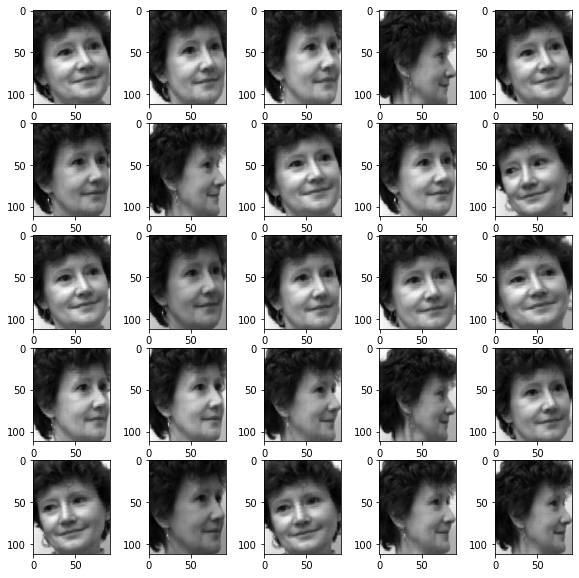

In [ ]:
fig, axs = plt.subplots(5, 5,figsize=(10,10))
axs = axs.ravel()
for i in range(25):
    axs[i].imshow(Y[:,:,i], cmap='gray')



---


## Q1.1 locally linear embedding (*)
Explore the LLE-embedding of the 33 faces on the $k = 5$ nearest neighbor graph and compare it against ISOMAP. 

In [ ]:
# Your code starts here



---


## Q1.2 Laplacian Eigenmaps (*)
Explore the Laplacian Eigenmaps of the 33 faces on the $k = 5$ nearest neighbor graph. 

In [ ]:
# Your code starts here



---


## Q1.3  Summary of all four methods (*)
Please compare with all four methods and comment on your findings.

# Your answer:



---


# Q2: DBSCAN clustering (30pt)
Let $\{\mathbf{x}^{(i)}\}_{i=1}^N\subset \mathbb{R}^D$ be a discrete set on unique points. Recall that the DBSCAN algorithm depends on two parameters: $\epsilon$ and MinPts. 

## Q2.1 Theory (*)
- Describe the behavior of DBSCAN as $\epsilon\rightarrow +\infty$ and as $\epsilon\rightarrow 0^+$. 

- Describe the behavior of DBSCAN as $\text{MinPts}\rightarrow +\infty$ and as $\text{MinPts}\rightarrow 0^+$. 

# Your answer:



---


## Q2.2 Implement DBSCAN (***)

In the `expand_cluster` we userecursive method which expands the cluster until we have reached the border of the dense area. This is called **Depth-first search**. This process could be very slow as you see from the class demo. 

In the following, please implement **breadth-first search** version of `expand_cluster`. instead, i.e, you will explore all neighbour points at the present depth prior to moving on to the next depth level. 


Please compare the performance and speed with the class demo example.  


In [ ]:

# Please only modify expand_cluster function. 


class DBSCAN():
    """A density based clustering method that expands clusters from 
    samples that have more neighbors within a radius specified by eps
    than the value minPts.
    Parameters:
    -----------
    eps: float
        The radius within which samples are considered neighbors
    minPts: int
        The number of neighbors required for the sample to be a core point. 
    """
    def __init__(self, eps=1, minPts=5):
        self.eps = eps
        self.minPts = minPts

    def _get_neighbors(self, sample_i):
        """ Return a list of indexes of neighboring samples
        A sample_2 is considered a neighbor of sample_1 if the distance between
        them is smaller than epsilon """
        neighbors = []
        for i, _sample in enumerate(self.X):
            distance = norm(self.X[sample_i]- _sample, 2)
            if distance < self.eps:
                neighbors.append(i)
        return np.array(neighbors)

    def _expand_cluster(self, sample_i, neighbors):
        # *** Your code starts here ***

        return cluster

    def _get_cluster_labels(self):
        """ Return the samples labels as the index of the cluster in which they are
        contained """
        # Set default value to number of clusters
        # Will make sure all outliers have same cluster label
        labels = np.full(shape=self.X.shape[0], fill_value=len(self.clusters))
        for cluster_i, cluster in enumerate(self.clusters):
            for sample_i in cluster:
                labels[sample_i] = cluster_i
        return labels

    # DBSCAN
    def predict(self, X):
        self.X = X
        self.clusters = []
        self.visited_samples = []
        self.neighbors = {}
        n_samples = np.shape(self.X)[0]
        # Iterate through samples and expand clusters from them
        # if they have more neighbors than self.minPts
        for sample_i in range(n_samples):
            if sample_i in self.visited_samples:
                continue
            self.neighbors[sample_i] = self._get_neighbors(sample_i)
            if len(self.neighbors[sample_i]) >= self.minPts:
                # If core point => mark as visited
                self.visited_samples.append(sample_i)
                # Sample has more neighbors than self.minPts => expand
                # cluster from sample
                new_cluster = self._expand_cluster(
                    sample_i, self.neighbors[sample_i])
                # Add cluster to list of clusters
                self.clusters.append(new_cluster)

        # Get the resulting cluster labels
        cluster_labels = self._get_cluster_labels()
        return cluster_labels



---


# Q3: Dimensionality Reduction via Diffusion Maps (40pt)


We have two JSON files for the swiss roll dataset. The swiss roll points.json contains 2000 points, each with 3 features and swiss roll labels.json contains labels for each of the 2000 points, ranging from 0 to 1. We used the provided function `read_json_files()` to read the two JSON files containing the data, swiss roll points.json and swiss roll labels.json, and pre-processed the data by centering it (i.e. data points have zero mean). Then, we visualized this data set using a scatter plot where the provided features are $x$, $y$, and $z$ coordinates and each point is colored by its label.



In [ ]:
def load_json_files(file_path):
    '''
    Loads data from a json file
    Inputs:
        file_path   the path of the .json file that you want to read in
    Outputs:
        json_data    this is a numpy array if data is numeric, it's a list if it's a string
    '''

    #  load data from json file
    with codecs.open(file_path, 'r', encoding='utf-8') as handle:
        json_data = json.loads(handle.read())

    # if a string, then returns list of strings
    if not isinstance(json_data[0], str):
        # otherwise, it's assumed to be numeric and returns numpy array
        json_data = np.array(json_data)

    return json_data


In [ ]:
!wget https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW3/swiss_roll_points.json?raw=true -O swiss_roll_points.json
!wget https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW3/swiss_roll_labels.json?raw=true -O swiss_roll_labels.json

!wget https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW3/ipsc_data.json?raw=true -O ipsc_data.json
!wget https://github.com/yexf308/AdvancedMachineLearning/blob/main/Homework/HW3/ipsc_channel_names.json?raw=true -O ipsc_channel_names.json



In [ ]:
# Read two data files
swiss_pts = load_json_files("swiss_roll_points.json")
swiss_labels = load_json_files("swiss_roll_labels.json")

print("swiss_pts shape: ", swiss_pts.shape, "swiss_labels shape: ", swiss_labels.shape)
print("Range of swiss_labels: [", min(swiss_labels), ",", max(swiss_labels), "]")

In [ ]:
fig =  px.scatter_3d(x=swiss_pts[:, 0], y=swiss_pts[:, 1], z=swiss_pts[:, 2], color=swiss_labels, size=5*ones(2000))
fig.update_traces(marker=dict(size=2))
fig.show()



---


## Q3.1: Visualizing Data with Diffusion Maps (*)

1. Construct the diffusion map $\Phi_t$ of the swiss roll data set using euclidean distance, Gaussian kernel
with width $\sigma=3$ and diffusion parameter $t=1$.

2. Create two-dimensional scatter plots of the diffusion mapping using different coordinates.

3. Plot the eigenvalues $\lambda_i$ of the Markov matrix $M$.

4. Repeat $\sigma=1$ and $\sigma=6$.

- As a dimensionality reduction technique, to what extent does diffusion mapping retain properties of the swiss roll data set? 

- Can you explain why the visualizations look like this, given how the algorithm works? 

- How does the choice of Gaussian kernel width $\sigma$ change the embedding and why? 

In [ ]:
# Your code starts here

## Your answer: 

---
## Q3.2: Using an Adaptive Gaussian Kernel (**)
we will use an adaptive $k$-nearest neighbors kernel to see the effect of using an adaptive Gaussian kernel. Let the $k$-nearest neighbors kernel $\kappa_{knn}$ be given by
$$\kappa_{knn}(\mathbf{x}^{(i)}, \mathbf{x}^{(j)})=\frac{1}{2}\left(\exp\left(-\frac{\|\mathbf{x}^{(i)}-\mathbf{x}^{(j)}\|}{\sigma_k(\mathbf{x}^{(i)})^2}\right) + \exp\left(-\frac{\|\mathbf{x}^{(i)}-\mathbf{x}^{(j)}\|}{\sigma_k(\mathbf{x}^{(j)})^2}\right)\right) $$

where $\sigma_k(\mathbf{x})$ is the distance from $\mathbf{x}$ to its $k$th nearest neighbor. Note that $\kappa_{knn}$ satisfies the properties of a kernel. Let $\sigma_{knn}=\{\sigma_1, \dots, \sigma_N\}$ denote these choices of adaptively chosen kernel parameters, for a fixed $k$. Now that we have defined this new adaptive kernel, let's see how it performs differently that a fixed-width
kernel.


1. Construct the diffusion map $\Phi_t$ of the swiss roll data set using euclidean distance, adpative $k$-nearest neighbour Gaussian kernel with $k=5$ and diffusion parameter $t=1$.

2. Create two-dimensional scatter plots of the diffusion mapping using different coordinates.

3. Plot the eigenvalues $\lambda_i$ of the Markov matrix $M$.

4. Repeat $k=10$.

- What are the differences between  fixed and adaptive choices of kernel parameters $\sigma$? Explain
this difference. 

- What can you learn about the intrinsic dimensionality of the data set from the eigenvalues of
$M$? 

- How does the choice of nearest neighbor parameter k change the diffusion map? 

- Which kernel method
would you recommend using for the swiss roll data set and why?


In [ ]:
# Your code starts here

## Your answer: